# Figure 10

In [1]:
import scanpy as sc

/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
adata_emb_combine = sc.read_h5ad("/projects/site/gred/resbioai/liut61/adata_resposneprediction.h5ad")


/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
adata_train = adata_emb_combine[adata_emb_combine.obs['batch'] == 'reference']
adata_test = adata_emb_combine[adata_emb_combine.obs['batch'] != 'reference']

In [4]:
# In[177]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# In[180]:


from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


# In[179]:


for C in [4.0, 4.5, 5.0, 5.5 ,6.0]:
    neigh =SVC(C=C) # C=5 is the best option
    neigh.fit(adata_train.X, adata_train.obs['Outcome'])
    print(classification_report(neigh.predict(adata_test.X), adata_test.obs['Outcome'].values))

# Then take the biggest weighted avg f1-score of all models ( and the same for the baseline )

               precision    recall  f1-score   support

Non-responder       1.00      0.47      0.64        15
    Responder       0.00      0.00      0.00         0

     accuracy                           0.47        15
    macro avg       0.50      0.23      0.32        15
 weighted avg       1.00      0.47      0.64        15

               precision    recall  f1-score   support

Non-responder       1.00      0.50      0.67        14
    Responder       0.12      1.00      0.22         1

     accuracy                           0.53        15
    macro avg       0.56      0.75      0.44        15
 weighted avg       0.94      0.53      0.64        15

               precision    recall  f1-score   support

Non-responder       0.71      0.71      0.71         7
    Responder       0.75      0.75      0.75         8

     accuracy                           0.73        15
    macro avg       0.73      0.73      0.73        15
 weighted avg       0.73      0.73      0.73        15

 

/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [5]:
sc.pp.neighbors(adata_train, use_rep='X')
sc.tl.umap(adata_train)

/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


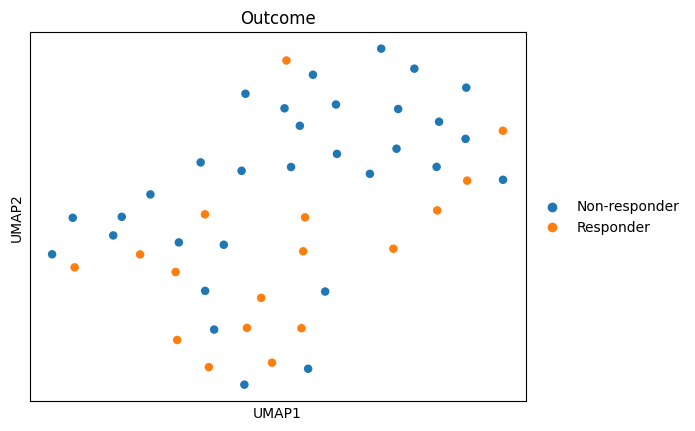

In [6]:
sc.pl.umap(adata_train, color='Outcome', size=150)

# baseline

In [7]:
adata_combine = sc.read("/projects/site/gred/resbioai/liut61/adata_resposneprediction_pseodubulk.h5ad")

/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [8]:
adata_train_raw = adata_combine[adata_combine.obs['batch'] == 'reference']
adata_test_raw = adata_combine[adata_combine.obs['batch'] != 'reference']

In [9]:
for C in [4.0, 4.5, 5.0, 5.5 ,6.0]:
    neigh =SVC(C=C)
    neigh.fit(adata_train_raw.X, adata_train_raw.obs['Outcome'])
    print(classification_report(neigh.predict(adata_test_raw.X), adata_test_raw.obs['Outcome'].values))

/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

               precision    recall  f1-score   support

Non-responder       0.00      0.00      0.00         0
    Responder       1.00      0.53      0.70        15

     accuracy                           0.53        15
    macro avg       0.50      0.27      0.35        15
 weighted avg       1.00      0.53      0.70        15



/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

               precision    recall  f1-score   support

Non-responder       0.00      0.00      0.00         0
    Responder       1.00      0.53      0.70        15

     accuracy                           0.53        15
    macro avg       0.50      0.27      0.35        15
 weighted avg       1.00      0.53      0.70        15



/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

               precision    recall  f1-score   support

Non-responder       0.00      0.00      0.00         0
    Responder       1.00      0.53      0.70        15

     accuracy                           0.53        15
    macro avg       0.50      0.27      0.35        15
 weighted avg       1.00      0.53      0.70        15



/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

               precision    recall  f1-score   support

Non-responder       0.00      0.00      0.00         0
    Responder       1.00      0.53      0.70        15

     accuracy                           0.53        15
    macro avg       0.50      0.27      0.35        15
 weighted avg       1.00      0.53      0.70        15

               precision    recall  f1-score   support

Non-responder       0.00      0.00      0.00         0
    Responder       1.00      0.53      0.70        15

     accuracy                           0.53        15
    macro avg       0.50      0.27      0.35        15
 weighted avg       1.00      0.53      0.70        15



/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/debroue1/scratch/conda/envs/pascient/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz